**Crop recommendation**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


N - ratio of Nitrogen content in soil,
P - ratio of Phosphorous content in soil,
K - ratio of Potassium content in soil,
temperature - temperature in degree Celsius,
humidity - relative humidity in %,
ph - ph value of the soil,
rainfall - rainfall in mm

--------------------------------------------------------------------------------------------------
visualization


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


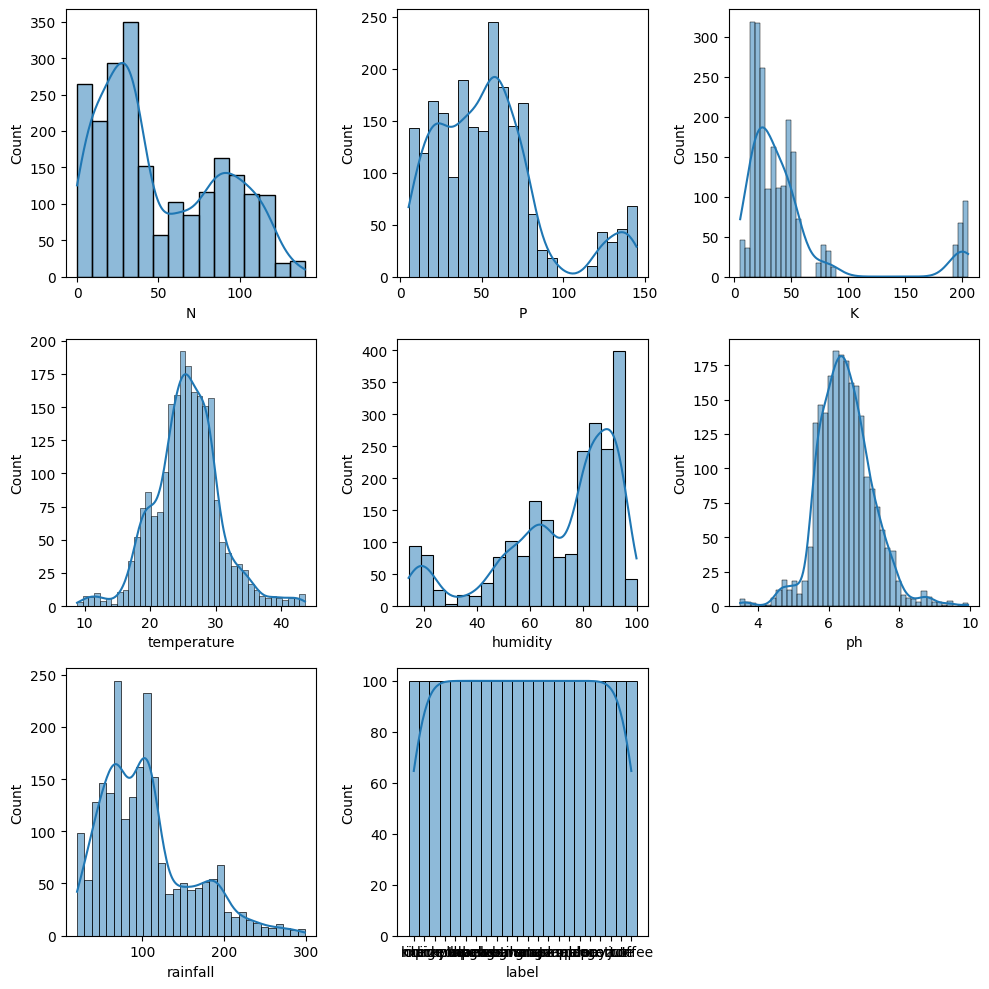

In [5]:
plt.figure(figsize=(10,10))
for i in enumerate(data.columns):
    plt.subplot(3,3,i[0]+1)
    sns.histplot(data[i[1]],kde=True)
plt.tight_layout()
plt.show()

Analysis of the data reveals that many of the variables have skewed distributions, indicating the presence of outliers. The central tendency for some variables, such as temperature and pH value, falls within a typical range.

In [6]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data.duplicated ().sum()

0

In [8]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: >

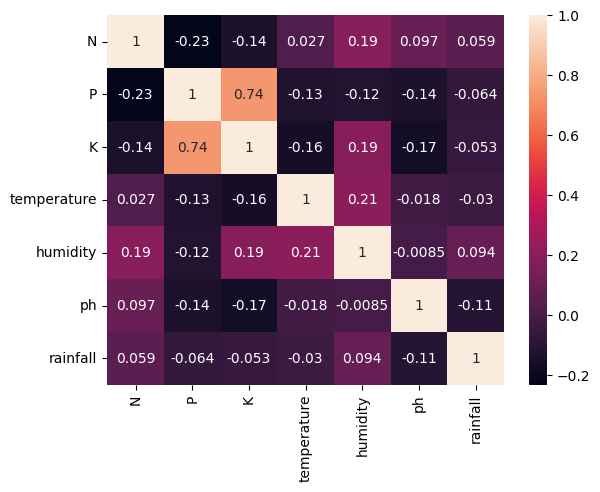

In [9]:
data_dropped=data.drop(['label'],axis=1)
sns.heatmap(data_dropped.corr(),annot=True)

------------------------------------------------------------------------------------------------------------------------------
Model building 

In [10]:
X=data_dropped
y=data['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=5)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       0.97      1.00      0.98        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.80      0.97      0.88        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.88      0.95      0.91        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       0.97      0.91      0.94        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
      papaya       1.00    

0.9803030303030303